In [3]:
## ■ 딥러닝 모델 중 CIFAR10을 사용하고,
##    그 중 하나의 이미지 테스트 셋을 pyplot으로 시각화 할 때 발생
## 각종 라이브러리가 설치되고나서 해당 라이브러리끼리 충돌이 있어서 발생
## 해결하는 방법은, pyplot 코드를 싥행하기 전에 해당 코드를 통해 
## OS를 Import/environ 설정을 진행해야만 함
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 만약 기본경로에 jupyter Notebook Config 파일이 존재하지 않을 경우,
## (기본경로 C:\Users\san.ryu\.jupyter\jupyter_notebook_config.py)
## Anaconda Prompt에서 다음과 같이 생성해주면 됨
## D:\DL_WS>jupyter notebook --generate-config

In [4]:
import numpy as np
import torch
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
## Line Plot
## Line Plot은 가장 기본적인 Plot으로, x / y Data의 관계를 선으로 표시
## x : X Data
## y : Y Data
## fmt : 색상, 마커, 선 스타일 등을 설정
## Guide Link
##  - 색상_https://matplotlib.org/stable/gallery/color/named_colors.html
##  - 마커_https://matplotlib.org/stable/api/markers_api.html
##  - 선스타일_https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

## 주식 데이터를 보기 위해 finance-datareader를 설치한다.
## 옵션/대소문자 유의
!pip install -U finance-datareader -q 

In [6]:
## 그리고 import
import FinanceDataReader as fdr ## 대소문자 유의

In [7]:
## 다운로드 : https://www.kaggle.com/uciml/iris
## Directory에- 복사/Colab에 Upload 후 Iris.csv 정보를 읽어본다.
iris_df = pd.read_csv('./Iris.csv')
##iris_df.head() ## head는 무슨 의미일까...
iris_df

## 특성에 따라 분류된 종류

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


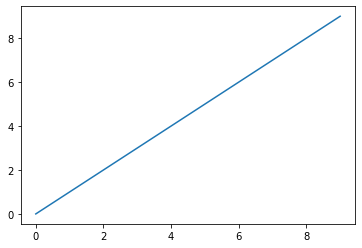

In [8]:
## 간단한 생성
data = np.arange(10)
plt.plot(data)
plt.show()

In [17]:
## Figure Subplot
fig = plt.figure()
plt.show()
## 단순히 Figure만 생성해서는 표가 나타나지 않는다.
## Subplot까지 만들어줘야 빈 차트가 생성된다

<Figure size 432x288 with 0 Axes>

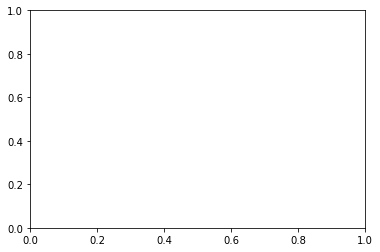

In [20]:
## 빈 subplot 생성
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

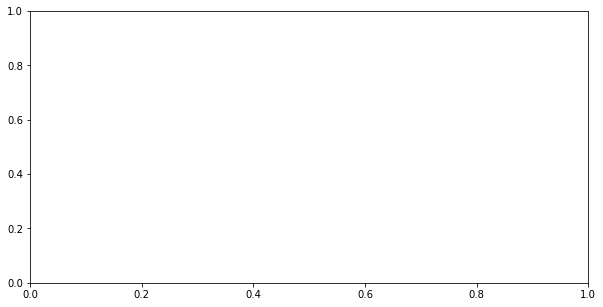

In [22]:
## figure Size 조정하기
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
plt.show()

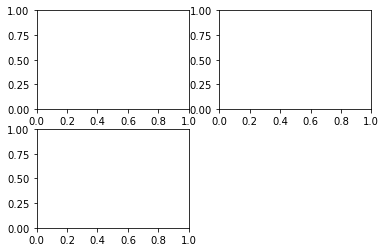

In [28]:
## 다수의 subplot 만들기
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
#ax4 = fig.add_subplot(2,2,4)
plt.show()

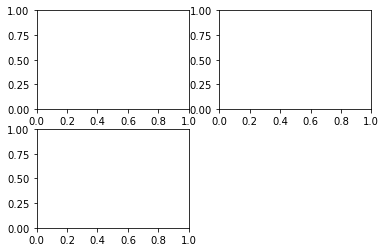

In [31]:
## 다수의 subplot 만들기2
## Comma 생략 가능
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(2,2,4)
plt.show()

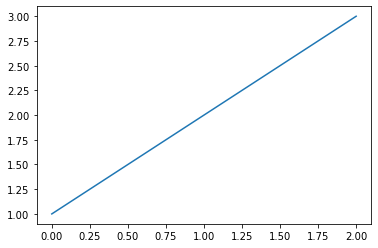

In [38]:
## plt로 graph 그리기
## 이는 위의 직선 그래프 그리기와 동일함
fig = plt.figure()
ax = fig.add_subplot()

data = np.array([1, 2, 3])

plt.plot(data)
plt.show()

In [2]:
## Line Plot
## Line Plot은 가장 기본적인 Plot으로, x / y Data의 관계를 선으로 표시
## x : X Data
## y : Y Data
## fmt : 색상, 마커, 선 스타일 등을 설정
## Guide Link
##  - 색상_https://matplotlib.org/stable/gallery/color/named_colors.html
##  - 마커_https://matplotlib.org/stable/api/markers_api.html
##  - 선스타일_https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

## 주식 데이터를 보기 위해 finance-datareader를 설치한다.
!pip install -U finance-datareader -q ## 옵션/대소문자 유의

In [30]:
## 그리고 import
import FinanceDataReader as fdr ## 대소문자 유의

In [7]:
df = fdr.DataReader('005930')
df.head()
## pandas data Framework을 가져옴
## 시가 고가 저가 종가 거래량 차이

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-12-03,688,750,654,749,641296,NaN
1997-12-04,784,807,784,808,431040,0.078772
1997-12-05,872,872,872,872,133760,0.079208
1997-12-06,822,891,802,822,566860,-0.057339
1997-12-08,786,813,757,758,373660,-0.077859


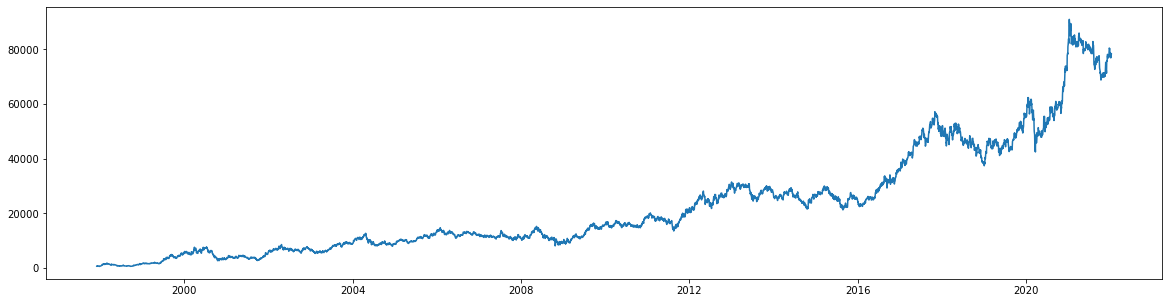

In [16]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot()
##ax.plot(df['Close'][-200:]) ## 끝에서 200개만
ax.plot(df['Close'][:]) ## 전체 데이터
plt.show()

In [2]:
## format 변경
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot()
##ax.plot(df['Close'][-200:], 'mo--') 
## m : magenta (색상) / g : Green, b : blue
## o : 동그라미 마커
## -- : 점선
ax.plot(df['Close'][-200:], 'g--') 
ax.plot(df['Close'][-200:], 'b-.') ## -.-. 형태
plt.show()

NameError: name 'plt' is not defined

In [28]:
## scatter plot
## scatter plot은 line plot과 유사하나, x / y Data의 관계를 점으로 표시
## scatter plot은 data간의 유사도와 같은 상관관계를 파악할 때 많이 사용
## 붓곷 데이터셋을 이용하여 scatter plot을 그려보자
## 링크에 접속하여 iris.csv 파일을 다운받는다. (Link : kaggle.com/uciml/Iris)
## Local Jupyter Notebook인 경우 : 현재 directory에 복사
## colab을 사용하는 경우 : iris.csv를 upload 한다

import pandas as pd

In [25]:
## Directory에- 복사/Colab에 Upload 후 Iris.csv 정보를 읽어본다.
iris_df = pd.read_csv('./Iris.csv')
iris_df.head()

## 특성에 따라 분류된 종류

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


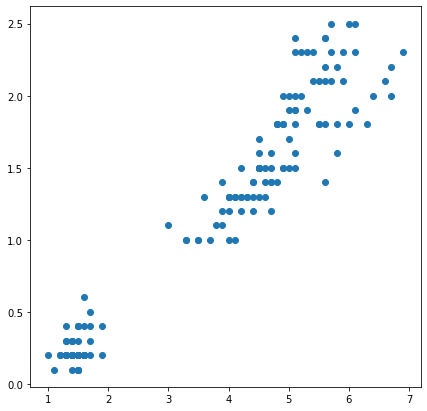

In [26]:
fig = plt.figure(figsize = (7, 7))

ax = fig.add_subplot()
ax.scatter(x = iris_df['PetalLengthCm'],
            y = iris_df['PetalWidthCm'])

plt.show()
## 둘이 선형을 나타내므로, 양의 상관관계를 가짐

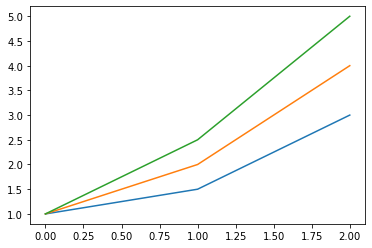

In [11]:
## 시각화 Part II
## 한 Subplot에 여러 Graph 그리기
## 3개의 그래프 동시 작성
fig = plt.figure()

ax = fig.add_subplot()
ax.plot([1, 1.5, 3])
ax.plot([1, 2, 4])
ax.plot([1, 2.5, 5])

plt.show() ## 이 부분이 생략되어도 플롯이 출력된다.
## 매 구문의 실행문에 생략되어있는 듯한 느낌...

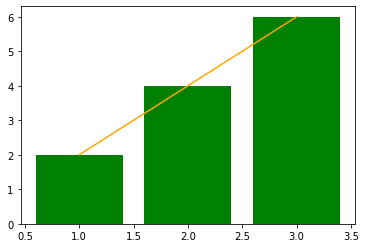

In [17]:
## Line Plot과 Bar Plot 동시에 그리기
fig = plt.figure()

ax = fig.add_subplot()
ax.plot([1, 2, 3], [2, 4, 6], color='orange')
ax.bar([1, 2, 3], [2, 4, 6], color='green')

plt.show() 

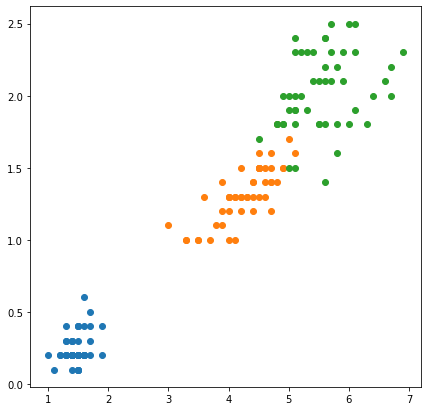

In [40]:
## Scatter Plot에서, Class별 색깔 다르게 변경
fig = plt.figure(figsize = (7, 7))

ax = fig.add_subplot()
 # 꽃의 종류 컬럼명 Species
for species in iris_df['Species'].unique():
    iris_sub = iris_df[iris_df['Species']==species]
    ax.scatter(x = iris_sub['PetalLengthCm'],
               y = iris_sub['PetalWidthCm']) ## 객체를 iris_df로 할 경우, 의미 없이 같은 색으로 나옴

plt.show()

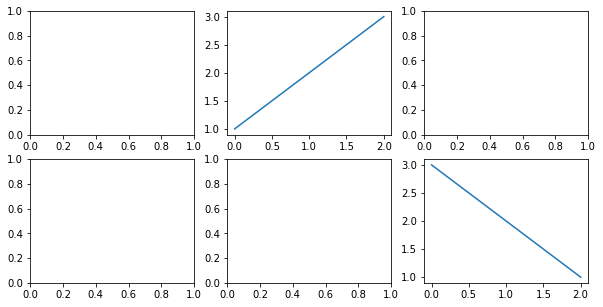

In [8]:
## plt.subplots 활용
flg, axes = plt.subplots(2, 3, figsize = (10, 5))
axes[0, 1].plot([1, 2, 3])
axes[1, 2].plot([3, 2, 1])
plt.show()

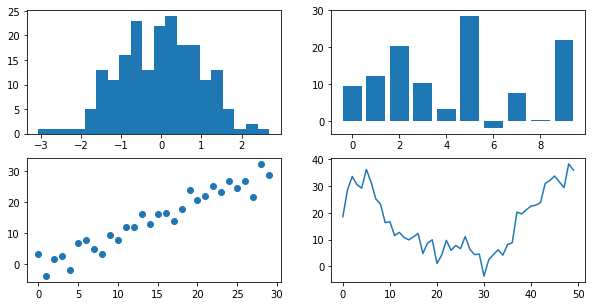

In [13]:
## 여러 그래프를 혼합하여 출력할 수 있다.
np.random.seed(1111)

fig, axes = plt.subplots(2, 2, figsize = (10, 5))
axes[0, 0].hist(np.random.randn(200), bins=20)
axes[0, 1].bar(np.arange(10), np.random.randn(10)*10+10)
axes[1, 0].scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
axes[1, 1].plot(np.random.randn(50).cumsum()*5+20)

plt.show()

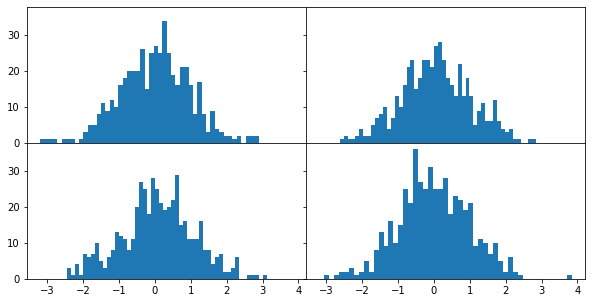

In [15]:
## 위 예시의 경우, 서로 다른 유형의 그래프를 사용하여, 그래프간 비교가 불가능하지만
## X축이나 Y축을 Share하여 그래프간의 비교를 수행할 수 있다.
np.random.seed(1111)

fig, axes = plt.subplots(2, 2, figsize = (10, 5), sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins = 50)
        
plt.subplots_adjust(wspace = 0, hspace = 0)
## width space / heignt space를 0으로 하면 그래프 사이의 여백이 0으로 지정되어
## 그래프 영역끼리 붙여주어, 더욱 비교가 편하도록 만들어줄 수 있다.

plt.show()

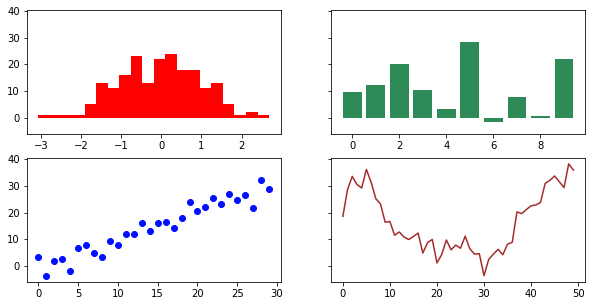

In [17]:
## 서로 색상을 다르게 지정해줄 수도 있다.
np.random.seed(1111)

fig, axes = plt.subplots(2, 2, figsize = (10, 5), sharey = True)
axes[0, 0].hist(np.random.randn(200), bins=20, color = 'r')
axes[0, 1].bar(np.arange(10), np.random.randn(10)*10+10, color = 'seagreen')
axes[1, 0].scatter(np.arange(30), np.arange(30)+3*np.random.randn(30), color = '#000fff')
axes[1, 1].plot(np.random.randn(50).cumsum()*5+20, color = 'brown')

plt.show()

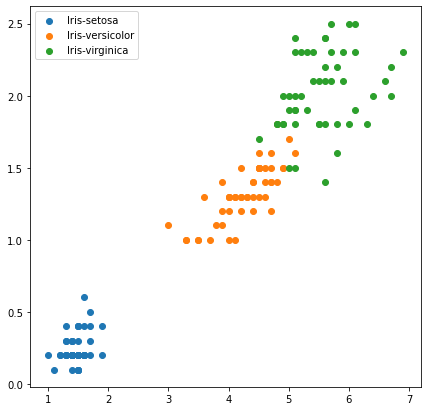

In [31]:
## Label 지정하기
fig = plt.figure(figsize = (7, 7))

ax = fig.add_subplot()

for species in iris_df['Species'].unique():
    iris_sub = iris_df[iris_df['Species'] == species]
    ax.scatter(x = iris_sub['PetalLengthCm'],
               y = iris_sub['PetalWidthCm'],
               label = species)
    
plt.legend()
plt.show()

In [28]:
## Image Data Visualization
## Image Data는 plt.imshow()를 이용하여 화면에 출력 가능
##  - X : image Data, gray scale의 경우, 2차원 RGP나 RGBA의 경우는 3차원의 data가 필요함.
##        이 때 data의 shape은 (height, width, channel) 순서이다.
##  - cmap : colormap (아래 링크 참조)
##  - Guide Link : https://matplotlib.org/stable/tutorials/colors/colormaps.html
##  - google에서 이미지를 검색/다운로드 한 후,
##    해당 이미지를 업로드 또는 Workspace로 이동한다
from PIL import Image

<function matplotlib.pyplot.show(close=None, block=None)>

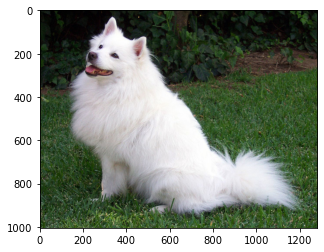

In [29]:
image = Image.open('./image01.jpg')

fig = plt.figure()

ax = fig.add_subplot()
ax.imshow(image)

plt.show

In [22]:
## 조금 더 복잡한 작업을 위해,
## Oxford IIIT Pet dataset을 다운받는다.
import os
import random
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

In [50]:
## gdown을 사용하려면 먼저 설치가 되어야 한다
!pip install gdown

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14262 sha256=c6e7bc523eccbdef78e972ac9d7110a33fc9be9524e1c9adff84f6996b30b960
  Stored in directory: c:\users\darke\appdata\local\pip\cache\wheels\2b\3c\51\52c46deda5cd1d59c6ce3d441ea5f3d155495dc294c4535a25
Successfully built gdown


In [53]:
# google Drive에서 압축된 dataset Download
import gdown
url = 'https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0'
fname = 'oxford_pet.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0
To: Z:\pytorch_workspace\oxford_pet.zip
100%|████████████████████████████████████████████████████████████████████████████| 811M/811M [02:03<00:00, 6.56MB/s]


'oxford_pet.zip'

In [ ]:
!unzip -q oxford_pet.zip -d oxford_pet

In [25]:
# 디렉터리 설정
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [23]:
# 이미지 파일에 대한 리스트 생성 
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']

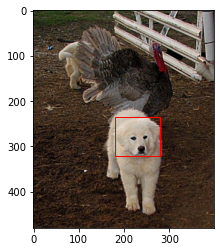

In [76]:
# bbox (bounding box)에서 데이터를 1건 추출한다.
# bbox에 있는 표본 수가 가장 적으므로...
rnd_idx = random.randint(1, len(bbox_files))

bbox_name = bbox_files[rnd_idx]
bbox_path = os.path.join(bbox_dir, bbox_name)
tree = et.parse(bbox_path)

width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

fname = os.path.splitext(bbox_name)[0] + '.jpg'
fpath = os.path.join(image_dir, fname)
image = Image.open(fpath)
#image = np.array(image)

bbox_name = os.path.splitext(fname)[0] + '.xml'

fig, ax = plt.subplots(1, 1)
rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill = False, color = 'red')
ax.add_patch(rect)
ax.imshow(image)
plt.show()


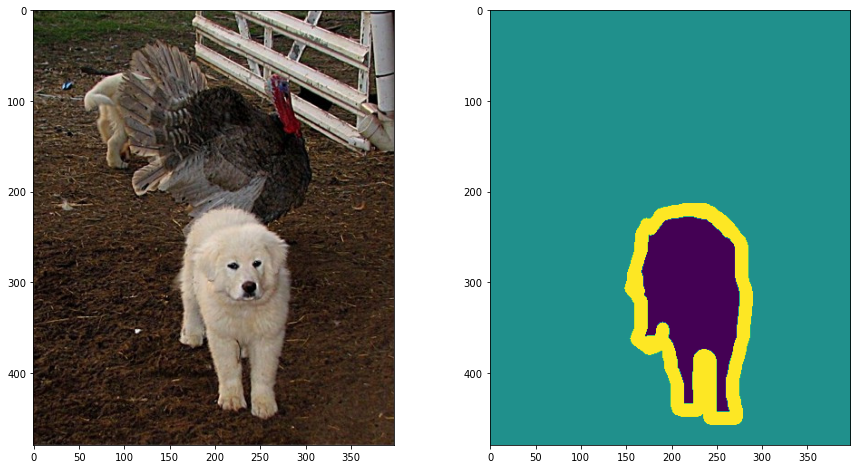

In [78]:
sname = os.path.splitext(bbox_name)[0] + '.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)

fig, ax = plt.subplots(1, 2, figsize = (15, 8))
ax[0].imshow(image)
ax[1].imshow(seg)
plt.show()

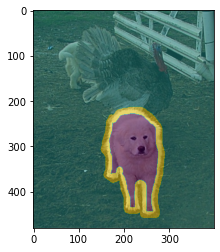

In [80]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(image)
ax.imshow(seg, alpha = 0.5)
## 만약, imshow에서 alpha값을 옵션으로 주지 않으면 
## seg (두번째 이미지)를 그대로 덮어 씌워버린다.
## 그래서 alpha값을 통해 투명도 옵션을 줘야 한다.
plt.show()